# Computational Workflows for biomedical data

Welcome to the course Computational Workflows for Biomedical Data. Over the next two weeks, you will learn how to leverage nf-core pipelines to analyze biomedical data and gain hands-on experience in creating your own pipelines, with a strong emphasis on Nextflow and nf-core.

Course Structure:

- Week 1: You will use a variety of nf-core pipelines to analyze a publicly available biomedical study.
- Week 2: We will shift focus to learning the basics of Nextflow, enabling you to design and implement your own computational workflows.<br>
- Final Project: The last couple of days, you will apply your knowledge to create a custom pipeline for analyzing biomedical data using Nextflow and the nf-core template.

## Basics

If you have not installed all required software, please do so now asap!


If you already installed all software, please go on and start answering the questions in this notebook. If you have any questions, don't hesitate to approach us.

1. What is nf-core?

A global community collaborating to build open-source Nextflow components and pipelines.
All nf-core code is community owned.
Everyone is welcome to use, contribute to, and help maintain nf-core.

Quelle: https://nf-co.re/about, https://nf-co.re/


2. How many pipelines are there currently in nf-core?

There are currently 139 pipelines available as part of nf-core.

Quelle: https://nf-co.re/pipelines/

3. Are there any non-bioinformatic pipelines in nf-core?

The most pipelines seem to be bioinformatic pipelines, however for example rangeland seem to be not bioinformatic in a classical way. It is a geographical best-practice analysis pipeline for remotely sensed imagery. The pipeline processes satellite imagery alongside auxiliary data in multiple steps to arrive at a set of trend files related to land-cover changes.

Quelle: https://nf-co.re/rangeland/1.0.0/

4. Let's go back a couple of steps. What is a pipeline and what do we use it for?

Pipeline

It is a set of ordered computational steps that take data as input, perform some specific analyses (e.g. alignment, quality control, ...), and produce results as output. Each step within a pipeline is usually reusable, and its ensures that they are connected in the correct order with the right dependencies and resources.

What do we use it for?

Instead of manually running each tool and handling intermediate files, the pipeline runs everything in the right order. With nf-core pipelines the version of each individual tool used/step done is version-controlled, tested, and containerized, so the same analysis can be reproduced anywhere.
They can be run on any laptop, cluster, or cloud without rewriting code and follow strict guidelines for best practices, making them reliable and easier to share.

Quelle: input lecture

5. Why do you think nf-core adheres to strict guidelines?

Nf-core follows strict guidelines because it wants all pipelines to follow the FAIR principles. It wants pipelines to be reproducible, consistent, maintainable (follow the same coding style), trustworthy (quality standards) and portable & scalable (as mentioned above).

QUelle: https://nf-co.re/docs/guidelines/pipelines/overview

6. What are the main features of nf-core pipelines?

Nf-core provides fully featured pipelines:

- Documentation covering installation, usage, and description of output files.
- Release of pipelines with tag to stable version.
- Open Source: licenced unter the MIT licence.
- CI Testing: Uses continuous-integration testing for changed made to pipelines.
- Pipelines are ultra-portable (can run everywhere: laptop, cluster, ...)
- Packaged Software: Also dependencies are downloaded and handeled automatically.

Quelle: https://nf-co.re/

## Let's start using the pipelines

1. Find the nf-core pipeline used to measure differential abundance of genes

nf-core/differentialabundance

In [ ]:
# run the pipeline in a cell 
# to run bash in jupyter notebooks, simply use ! before the command
# e.g.

!pwd


# For the tasks in the first week, please use the command line to run your commands 
# and simply paste the commands you used in the respective cells!


/home/chrissi/BioPrak/computational-workflows-2025/notebooks/day_01


In [2]:
# run the pipeline in the test profile using docker containers
# make sure to specify the version you want to use (use the latest one)


!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir './results'
# --outdir specifies the output folder

# sigularity can be used instead of docker if preferred
# 
# For more options, check the nf-core/differentialabundance documentation: https://nf-co.re/differentialabundance/usage


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [intergalactic_wiles] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : intergalactic_wiles
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /home/chrissi/BioPrak/co

In [3]:
# repeat the run. What did change?

!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir './results'

# Runtime changed from 6min 49s to 7min 36s minutes.
# The pipeline re-runs all steps again
# because the output folder is the same as before and Nextflow does not overwrite the execution report, but creates a new one


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [thirsty_rubens] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : thirsty_rubens
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /home/chrissi/BioPrak/computationa

In [4]:
# now set -resume to the command. What did change?

!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir './results' -resume

# -resume will use the files that were already downloaded and calculated in the previous runs
# So it will not download and calculate everything from scratch again
# It will only re-run steps that were not completed in the previous run (e.g. for minor changes in the command)
# Runtime is 48s, which is much faster than the previous runtimes
# So -resume is very useful when re-running the same analysis with only small changes


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [kickass_becquerel] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : kickass_becquerel
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /home/chrissi/BioPrak/comput

Check out the current directory. Next to the outdir you specified, what else has changed?

- During the runs, folders are created within a work folder 
- also at the main directory netxflow.log-files were created for each run that was performed

In [5]:
# delete the work directory and run the pipeline again using -resume. What did change?

!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir './results' -resume

# It is again starting to download and calculate everything from scratch.
# The work file seems to include all the calculations needed to build on when using resume
# So when the work folder is deleted, resume cannot use any of the previous calculations


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [jovial_feynman] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : jovial_feynman
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /home/chrissi/BioPrak/computationa

What changed?

- It is again starting to download and calculate everything from scratch.
- The work file seems to include all the calculations needed to build on when using resume

## Lets look at the results

### What is differential abundance analysis?

Differential abundance analysis is a statistical method used to identify features whose abundance levels differ significantly between experimental groups like treated vs. control samples.

Give the most important plots from the report:

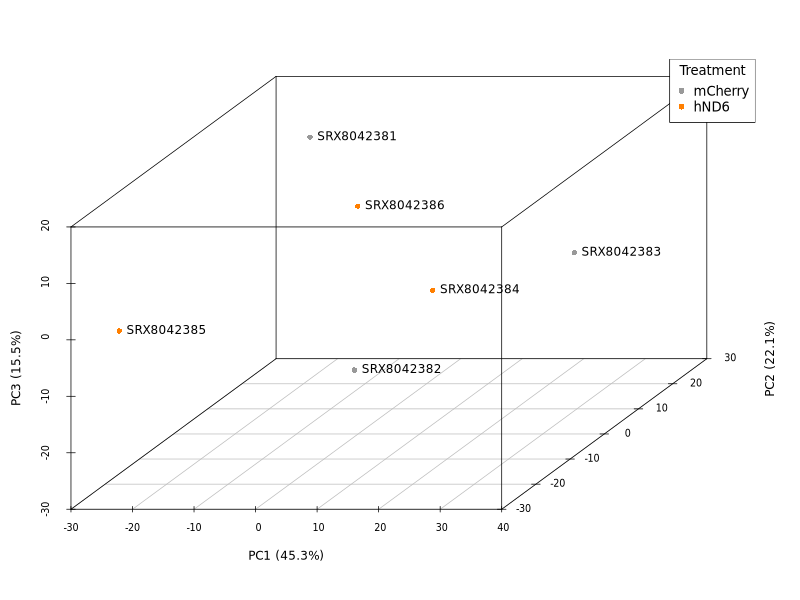

In [9]:
from PIL import Image

# Open the image
img = Image.open("/home/chrissi/BioPrak/computational-workflows-2025/notebooks/day_01/results/plots/exploratory/treatment/png/pca3d.png")

# Show it
img.show()

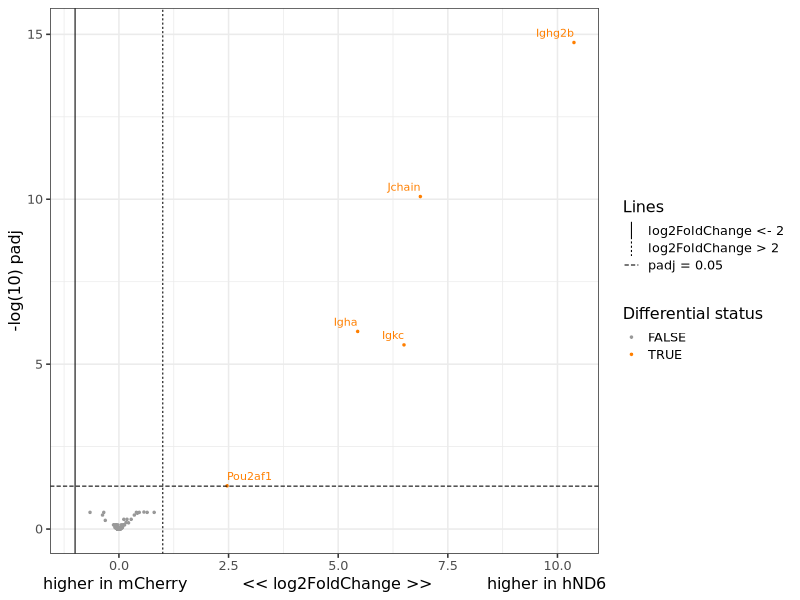

In [10]:
img = Image.open("/home/chrissi/BioPrak/computational-workflows-2025/notebooks/day_01/results/plots/differential/treatment_mCherry_hND6_/png/volcano.png")
img.show()


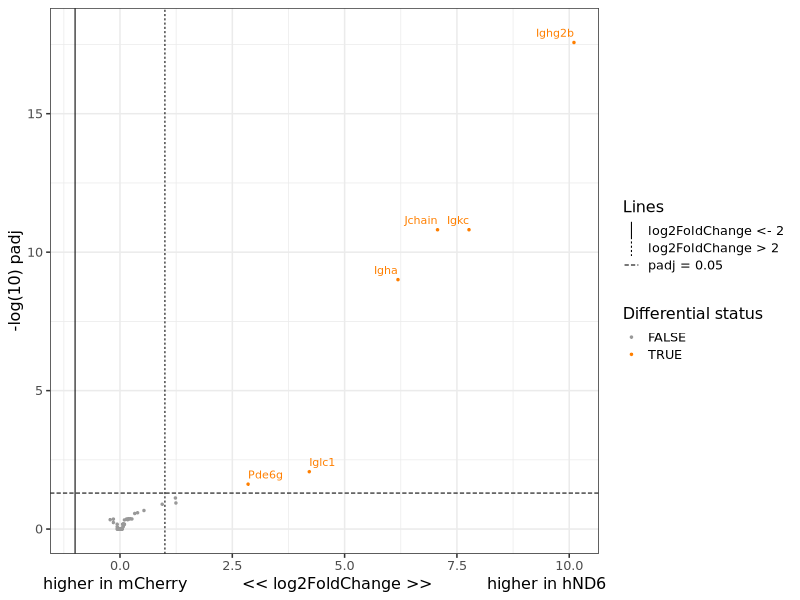

In [11]:
img = Image.open("/home/chrissi/BioPrak/computational-workflows-2025/notebooks/day_01/results/plots/differential/treatment_mCherry_hND6_sample_number/png/volcano.png")
img.show()